In [25]:
import config
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pprint import pprint
import pandas as pd 

In [26]:
auth = SpotifyClientCredentials(
    client_id=config.SPOTIPY_CLIENT_ID,
    client_secret=config.SPOTIPY_CLIENT_SECRET
)

token = auth.get_access_token()
sp = spotipy.Spotify(auth=token)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


In [29]:
def get_tracks_from_playlist(playlist_URI):
    offset = 0
    tracklist = []
    while True:
        response = sp.playlist_tracks(playlist_URI,
                                     offset=offset,
                                     fields='items.track.id,total',
                                     additional_types=['track'])
        tracks = response['items']
        for track in tracks:
            track_id = track['track']['id']
            tracklist.append(track_id)

        offset = offset + len(response['items'])
#         print(offset, "/", response['total'])

        if len(response['items']) == 0:
            break
            
    return tracklist

def create_augmented_df(playlist_URI, polarity=None):
    df = pd.DataFrame(columns=['track id'])
    df['track id'] = get_tracks_from_playlist(playlist_URI)
    if polarity:
        df['gt label'] = df['track id'].apply(lambda x: polarity)
    df['track name'] = df['track id'].apply(lambda x: sp.tracks([x])['tracks'][0]['name'])
    df['artist'] = df['track id'].apply(lambda x: sp.tracks([x])['tracks'][0]['artists'][0]['name'])
    audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    df = df.reindex(df.columns.tolist() + audio_features, axis=1)
    for i in range(len(df)):
        track_id = df['track id'][i]
        analysis = sp.audio_features(track_id)[0]
        for feature in audio_features:
            df[feature][i] = analysis[feature]
#     df['danceability'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["danceability"])
#     df['energy'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["energy"])
#     df['key'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["key"])
#     df['loudness'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["loudness"])
#     df['mode'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["mode"])
#     df['speechiness'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["speechiness"])
#     df['acousticness'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["acousticness"])
#     df['instrumentalness'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["instrumentalness"])
#     df['liveness'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["liveness"])
#     df['valence'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["valence"])
#     df['tempo'] = df['track id'].apply(lambda x: sp.audio_features(x)[0]["tempo"])
    return df



In [30]:
# happy beats
df1 = create_augmented_df('spotify:playlist:37i9dQZF1DWSf2RDTDayIx', 1)
df1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


track id  gt label  \
0  2u6Jm2klS4yvAlbSHlxUwI         1   
1  2hCKAnd2BPo2VD65XZC3rH         1   
2  73h6Ma5QhBFrshEN2CTevS         1   
3  75rGONmoi48LLYBFaGiYsv         1   
4  5zn3TuX5oBHrEv8R9KyLir         1   

                                  track name        artist  danceability  \
0                                      Alane  Robin Schulz         0.581   
1                         Your Place or Mine     Wahlstedt         0.863   
2                                    Someday          Kygo         0.612   
3                          Both Of Us - Edit       Jayda G         0.735   
4  Ladida (My Heart Goes Boom) [feat. ILIRA]       CRISPIE         0.682   

   energy   key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.799   3.0    -6.660   1.0       0.1640       0.04190          0.000009   
1   0.608   7.0    -2.996   1.0       0.1490       0.18000          0.000003   
2   0.686   7.0    -6.838   1.0       0.1200       0.17300          0.000000   
3   0.710  11.0   -10.222   1.0       0.0766       0.00851          0.762000   
4   0.812   0.0    -4.931   1.0       0.0307       0.11100          0.000021   

   liveness  valence    tempo  
0    0.1100    0.662  124.002  
1    0.1140    0.389  126.053  
2    0.1410    0.326  122.115  
3    0.0684    0.507  123.962  
4    0.1370    0.455  126.040

In [31]:
# life sucks
df2 = create_augmented_df('spotify:playlist:37i9dQZF1DX3YSRoSdA634', 0)
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


track id           track name          artist  danceability  \
0  4CxFN5zON70B3VOPBYbd6P  you were good to me   Jeremy Zucker         0.561   
1  0VhgEqMTNZwYL1ARDLLNCX         Can I Be Him    James Arthur         0.696   
2  4IhAzl3KH8P7KFJ5KfBnvy     Pearl in Sandbox  Júníus Meyvant         0.595   
3  2TIlqbIneP0ZY1O0EzYLlc    Someone You Loved   Lewis Capaldi         0.501   
4  6ynqpQIQ1kGtJILbxnCIQ8              Tourist    Axel Flóvent         0.455   

   energy   key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.0848   2.0   -15.099   1.0       0.0404         0.913          0.000026   
1  0.5430  11.0    -6.164   1.0       0.0489         0.308          0.000000   
2  0.0626   8.0   -21.945   1.0       0.0452         0.917          0.076500   
3  0.4050   1.0    -5.679   1.0       0.0319         0.751          0.000000   
4  0.2090   6.0   -12.150   0.0       0.0265         0.741          0.001940   

   liveness  valence    tempo  
0    0.1120    0.206  102.128  
1    0.0939    0.479  107.969  
2    0.0987    0.259  126.337  
3    0.1050    0.446  109.891  
4    0.1130    0.109   89.909

In [21]:
df_test = pd.concat([df1, df2])
df_test

track id  gt label  \
0   2u6Jm2klS4yvAlbSHlxUwI       1.0   
1   2hCKAnd2BPo2VD65XZC3rH       1.0   
2   73h6Ma5QhBFrshEN2CTevS       1.0   
3   75rGONmoi48LLYBFaGiYsv       1.0   
4   5zn3TuX5oBHrEv8R9KyLir       1.0   
..                     ...       ...   
95  0xRO7EKgYKVB8zKIoiXMDD       NaN   
96  4pjNeKzXQcoYRdNDgdrwyR       NaN   
97  5V0CRoCDeDpGTXZGWPTk3D       NaN   
98  5cBjZGgtUcX5gjnrswWF6h       NaN   
99  0CW81RHrf389cVuXrR8dun       NaN   

                                      track name        artist  danceability  \
0                                          Alane  Robin Schulz         0.581   
1                             Your Place or Mine     Wahlstedt         0.863   
2                                        Someday          Kygo         0.612   
3                              Both Of Us - Edit       Jayda G         0.735   
4      Ladida (My Heart Goes Boom) [feat. ILIRA]       CRISPIE         0.682   
..                                           ...           ...           ...   
95  God I Hope This Year Is Better Than The Last          SYML         0.353   
96                           Thursday - Acoustic   Jess Glynne         0.542   
97                                       Silence        Reggii         0.741   
98                            Golden Days - Live   Josh Savage         0.653   
99                                    Photograph    Royal Wood         0.536   

    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0    0.799    3    -6.660     1       0.1640       0.04190          0.000009   
1    0.608    7    -2.996     1       0.1490       0.18000          0.000003   
2    0.686    7    -6.838     1       0.1200       0.17300          0.000000   
3    0.710   11   -10.222     1       0.0766       0.00851          0.762000   
4    0.812    0    -4.931     1       0.0307       0.11100          0.000021   
..     ...  ...       ...   ...          ...           ...               ...   
95   0.185    0   -12.557     1       0.0388       0.92000          0.024400   
96   0.316    2    -6.189     1       0.0374       0.79500          0.000000   
97   0.117    7   -12.427     0       0.0490       0.93100          0.000164   
98   0.198    1   -10.538     1       0.0295       0.93300          0.000000   
99   0.264    2   -10.646     1       0.0240       0.78900          0.000022   

    liveness  valence    tempo  
0     0.1100    0.662  124.002  
1     0.1140    0.389  126.053  
2     0.1410    0.326  122.115  
3     0.0684    0.507  123.962  
4     0.1370    0.455  126.040  
..       ...      ...      ...  
95    0.1060    0.175  118.467  
96    0.0960    0.580  140.869  
97    0.1750    0.349  124.087  
98    0.1200    0.286  100.168  
99    0.1450    0.170   81.118  

[319 rows x 15 columns]

In [22]:
df_test.to_csv('data/test.csv', index=False)

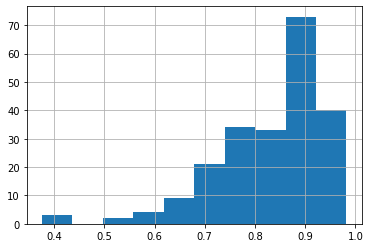

In [32]:
df1['energy'].hist()

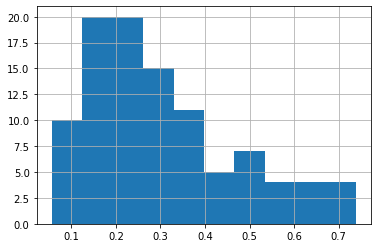

In [33]:
df2['energy'].hist()

In [34]:
train_df1 = create_augmented_df('spotify:playlist:37i9dQZF1DX7KNKjOK0o75') # have a great day
train_df2 = create_augmented_df('spotify:playlist:37i9dQZF1DX3rxVfibe1L0') # mood booster
train_df3 = create_augmented_df('spotify:playlist:37i9dQZF1DX4fpCWaHOned') # confidence boost
train_df4 = create_augmented_df('spotify:playlist:37i9dQZF1DX6xZZEgC9Ubl') # tear drop
train_df5 = create_augmented_df('spotify:playlist:37i9dQZF1DX59NCqCqJtoH') # idk.
train_df6 = create_augmented_df('spotify:playlist:37i9dQZF1DWSqBruwoIXkA') # down in the dumps
df_train = pd.concat([train_df1, train_df2, train_df3, train_df4, train_df5, train_df6])
df_train

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


track id                         track name  \
0   3fH4KjXFYMmljxrcGrbPj9        Don't You (Forget About Me)   
1   4RvWPyQ5RL0ao9LPZeSouE  Everybody Wants To Rule The World   
2   58E1XVmZTODC67YNjneuXM                       Tainted Love   
3   2HuHopKnnuGQEpGb0CssCs               Hungry Like the Wolf   
4   1QbQL5m30YNvukitIqAnFG                Sunglasses At Night   
..                     ...                                ...   
87  4X2caEGywKxXKGImqNkBmt                If You're Gonna Lie   
88  0fNK8zD8S2douor2RMw6LW                         Heart Hope   
89  3rTnGUeDrnZV22DvRuUuXr                               Wait   
90  6Vigp41BietH0WoFZ52JI5                          All We Do   
91  4hjbxjZpJ8H6qRCzDOGI0M           Sick of Losing Soulmates   

             artist  danceability  energy   key  loudness  mode  speechiness  \
0      Simple Minds         0.660   0.816   2.0    -6.610   1.0       0.0299   
1   Tears For Fears         0.645   0.795   7.0   -12.095   1.0       0.0527   
2         Soft Cell         0.542   0.450   7.0    -9.931   0.0       0.0361   
3       Duran Duran         0.654   0.903   0.0    -5.252   1.0       0.0798   
4        Corey Hart         0.686   0.609  10.0   -11.469   0.0       0.0444   
..              ...           ...     ...   ...       ...   ...          ...   
87         FLETCHER         0.671   0.763   8.0    -5.877   1.0       0.3050   
88        Oh Wonder         0.385   0.371   8.0   -13.365   1.0       0.0504   
89              M83         0.437   0.229   2.0   -10.514   1.0       0.0308   
90        Oh Wonder         0.590   0.242  10.0   -11.724   0.0       0.0516   
91            dodie         0.478   0.241   2.0   -17.122   1.0       0.0386   

    acousticness  instrumentalness  liveness  valence    tempo  
0         0.1680          0.018100    0.0608   0.6780  111.346  
1         0.3470          0.003890    0.1040   0.5350  112.067  
2         0.5580          0.000006    0.5790   0.6260  144.437  
3         0.0222          0.000000    0.2410   0.6070  129.442  
4         0.2580          0.000150    0.1130   0.7190  127.736  
..           ...               ...       ...      ...      ...  
87        0.6070          0.000022    0.4950   0.4690  149.870  
88        0.9410          0.044500    0.1080   0.0796  122.177  
89        0.2210          0.059900    0.0935   0.0754  147.911  
90        0.9780          0.000124    0.0906   0.3660  126.721  
91        0.7160          0.216000    0.3540   0.1100   75.285  

[540 rows x 14 columns]

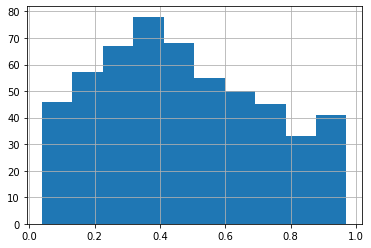

In [39]:
df_train.to_csv('data/train.csv', in)